# Question

Find the airport that has the highest average departure delay among all airports. Consider 0 minutes delay for flights that departed early. Output one line of results: the airport name, code, and average delay.

# Query

```sql
select L_AIRPORT.Name, avg_delay.Origin as airport_code, avg_delay.avg_departure_delay
from (
    select Origin, avg(DepDelayMinutes) as avg_departure_delay
    from al_perf
    group by Origin
) as avg_delay
join L_AIRPORT on avg_delay.Origin = L_AIRPORT.Code
order by avg_delay.avg_departure_delay desc
limit 1;
```

# Result

1 rows returned

# Visualization

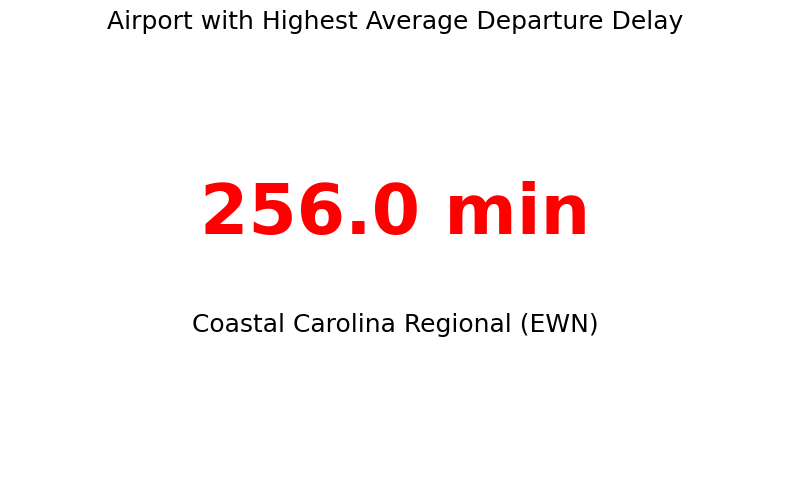

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("../csv/mini_project_<problem4_Mingyang_Han_mh2393>.csv") 

# Extract the airport name after the colon (e.g., "Coastal Carolina Regional")
df['airport_name_clean'] = df['Name'].apply(lambda x: x.split(':')[-1].strip())

# Find the airport with the highest average departure delay
max_delay_row = df.loc[df['avg_departure_delay'].idxmax()]

airport_name = max_delay_row['airport_name_clean']
airport_code = max_delay_row['airport_code']
avg_delay = max_delay_row['avg_departure_delay']


plt.figure(figsize=(8,5))

# Show the average delay in large red font
plt.text(0.5, 0.6, f"{avg_delay:.1f} min", fontsize=50, ha='center', va='center', color='red', fontweight='bold')

# Show the airport name and code below the number
plt.text(0.5, 0.35, f"{airport_name} ({airport_code})", fontsize=18, ha='center', va='center')


plt.axis('off')
plt.title("Airport with Highest Average Departure Delay", fontsize=18)

plt.tight_layout()
plt.show()



# Conclusion

The airport with the longest average departure delay is Coastal Carolina Regional Airport (EWN) in New Bern/Morehead/Beaufort, NC, with an average delay of 256 minutes.
